**Importing Necessary Libraries**

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from pylab import rcParams

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

**Reading the data set**

In [2]:
df =pd.read_csv('Cervical_Cancer_Risk_Cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,52.0,5.0,16.0,4.0,1.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,46.0,3.0,21.0,4.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 34 columns):
Unnamed: 0                            668 non-null int64
Age                                   668 non-null float64
Number of sexual partners             668 non-null float64
First sexual intercourse              668 non-null float64
Num of pregnancies                    668 non-null float64
Smokes                                668 non-null float64
Smokes (years)                        668 non-null float64
Hormonal Contraceptives               668 non-null float64
Hormonal Contraceptives (years)       668 non-null float64
IUD                                   668 non-null float64
IUD (years)                           668 non-null float64
STDs                                  668 non-null float64
STDs (number)                         668 non-null float64
STDs:condylomatosis                   668 non-null float64
STDs:cervical condylomatosis          668 non-null float64
STDs:vaginal

**Basic statistics of the data**

In [32]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,668.0,417.121257,246.590031,0.0,202.75,421.0,621.25,857.0
Age,668.0,27.264970,8.727432,13.0,21.00,26.0,33.00,84.0
Number of sexual partners,668.0,2.523952,1.640299,1.0,2.00,2.0,3.00,28.0
First sexual intercourse,668.0,17.142216,2.852046,10.0,15.00,17.0,18.00,32.0
Num of pregnancies,668.0,2.323353,1.465319,0.0,1.00,2.0,3.00,11.0
Smokes,668.0,0.143713,0.351061,0.0,0.00,0.0,0.00,1.0
Smokes (years),668.0,1.235524,4.193611,0.0,0.00,0.0,0.00,37.0
Hormonal Contraceptives,668.0,0.643713,0.479260,0.0,0.00,1.0,1.00,1.0
Hormonal Contraceptives (years),668.0,2.290037,3.724400,0.0,0.00,0.5,3.00,22.0
IUD,668.0,0.112275,0.315942,0.0,0.00,0.0,0.00,1.0


**There is no missing value.**

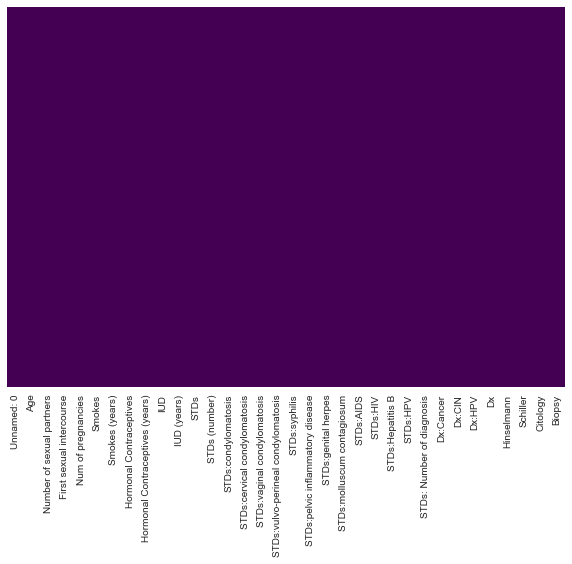

In [5]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

**Swarm & Box plots of different features.**
1. Age & Cancer
2. Number of sexual partners & Cancer
3. First sexual intercourse & Cancer

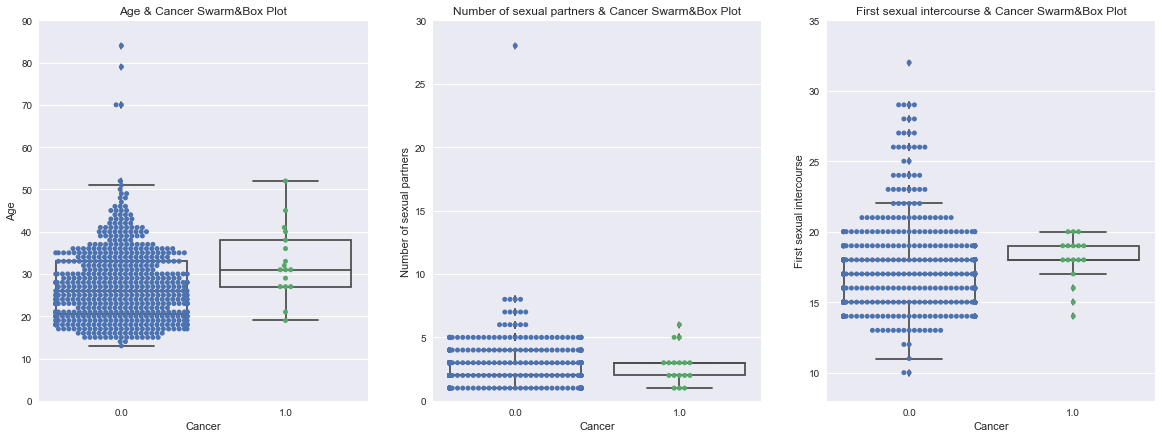

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(20, 7)
_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Age', data = df, ax=ax1)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Age', data=df, boxprops={'facecolor':'None'}, ax=ax1)
_ = ax1.set_xlabel('Cancer')
_ = ax1.set_ylabel('Age')
_ = ax1.set_title ('Age & Cancer Swarm&Box Plot')
_ = ax1.set_ylim(0,90)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Number of sexual partners', data = df, ax=ax2)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Number of sexual partners', data=df, boxprops={'facecolor':'None'}, ax=ax2)
_ = ax2.set_xlabel('Cancer')
_ = ax2.set_ylabel('Number of sexual partners')
_ = ax2.set_title ('Number of sexual partners & Cancer Swarm&Box Plot')
_ = ax2.set_ylim(0,30)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'First sexual intercourse', data = df, ax=ax3)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'First sexual intercourse', data=df, boxprops={'facecolor':'None'}, ax=ax3)
_ = ax3.set_xlabel('Cancer')
_ = ax3.set_ylabel('First sexual intercourse')
_ = ax3.set_title ('First sexual intercourse & Cancer Swarm&Box Plot')
_ = ax3.set_ylim(8,35)


plt.show()

**We will examine correlations between these features in the inferential statistics stage as well.**

**Distribution plots of the same features.
1. Age & Cancer**
2. Number of sexual partners & Cancer
3. First sexual intercourse & Cancer

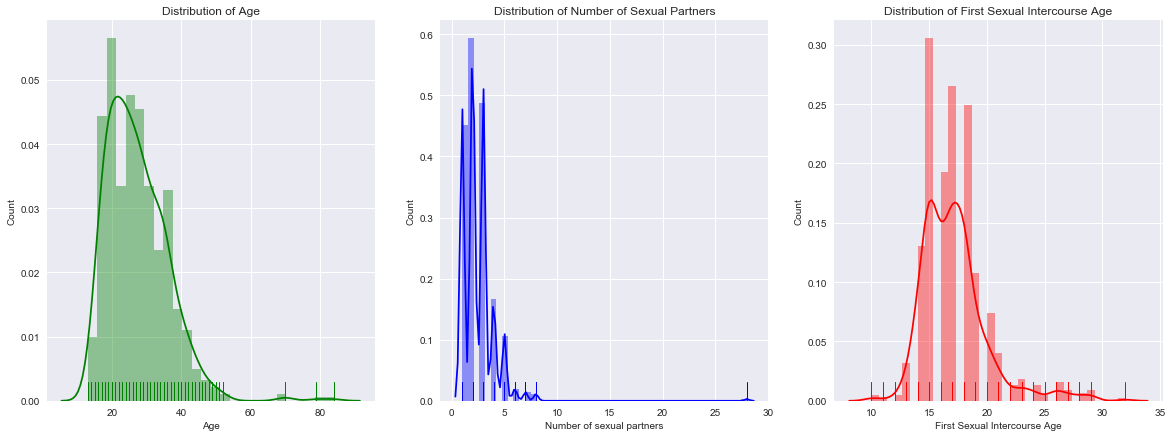

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(20, 7)
_ = sns.distplot(df.Age, rug='True', color = 'green', norm_hist = True, ax = ax1)
_ = ax1.set_xlabel('Age', fontsize=10)
_ = ax1.set_ylabel('Count', fontsize=10)
_ = ax1.set_title('Distribution of Age', fontsize=12)

_ = sns.distplot(df['Number of sexual partners'], rug='True', color = 'blue', norm_hist = True, ax = ax2)
_ = ax2.set_xlabel('Number of sexual partners', fontsize=10)
_ = ax2.set_ylabel('Count', fontsize=10)
_ = ax2.set_title('Distribution of Number of Sexual Partners', fontsize=12)

_ = sns.distplot(df['First sexual intercourse'], rug='True', color = 'red', norm_hist = True, ax = ax3)
_ = ax3.set_xlabel('First Sexual Intercourse Age', fontsize=10)
_ = ax3.set_ylabel('Count', fontsize=10)
_ = ax3.set_title('Distribution of First Sexual Intercourse Age', fontsize=12)
plt.show()

**All three distributions looks like normal but skewed to right. On the middle plot there is only one outlier which is shown below. Maybe we could drop this outlier but Cervical Cancer Risk studies assume that sexual intercourses in early ages, high number of sexual partners and smoking also increase Cervical Cancer Risk, however this example below somehow might help alternative hypothesis.This is the reason we will keep it for the time being.**

In [8]:
df1 = df[df['Number of sexual partners'] > 25]
df1

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
371,467,16.0,28.0,10.0,1.0,1.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Correlation heatmap of all features.**

Text(0.5,1,u'Heatmap of Correlation Between Features')

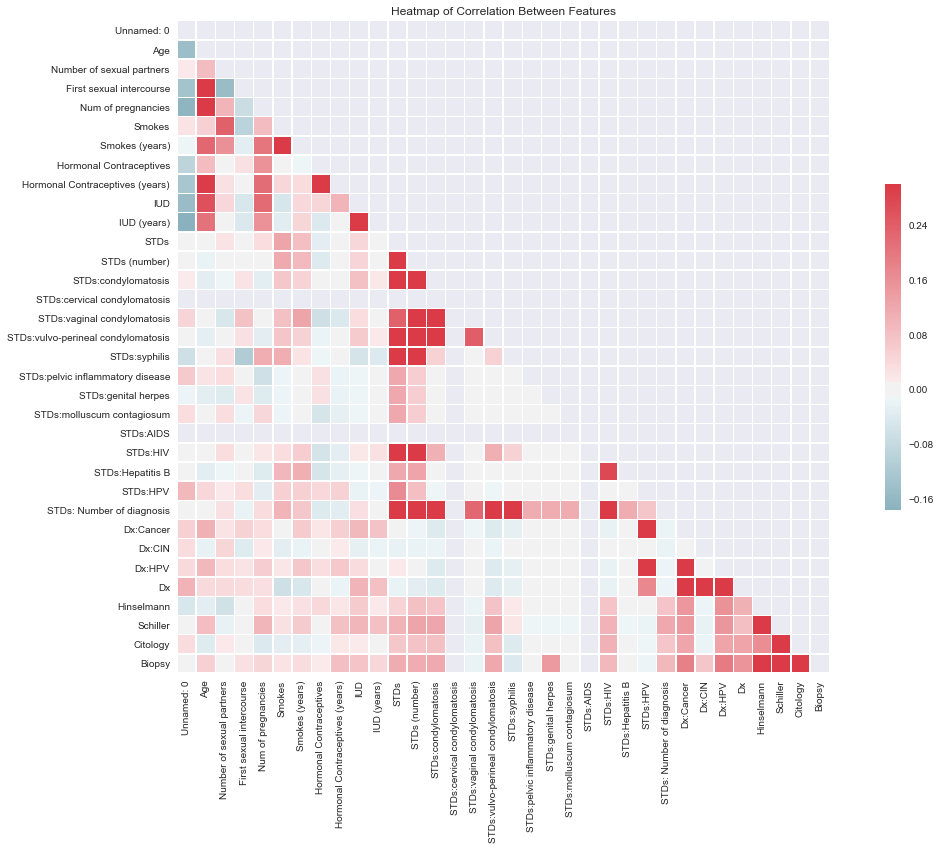

In [13]:
corr = df.corr(method="pearson")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Between Features')

**As seen above some features have no correlation with 'Dx:Cancer',in our logistic regression model, we will implement both ways (with and without them) to find the most accurate results.**

**Scatter plot of Correlation between First sexual intercourse and Number of sexual partners. We have added regression line as well. 

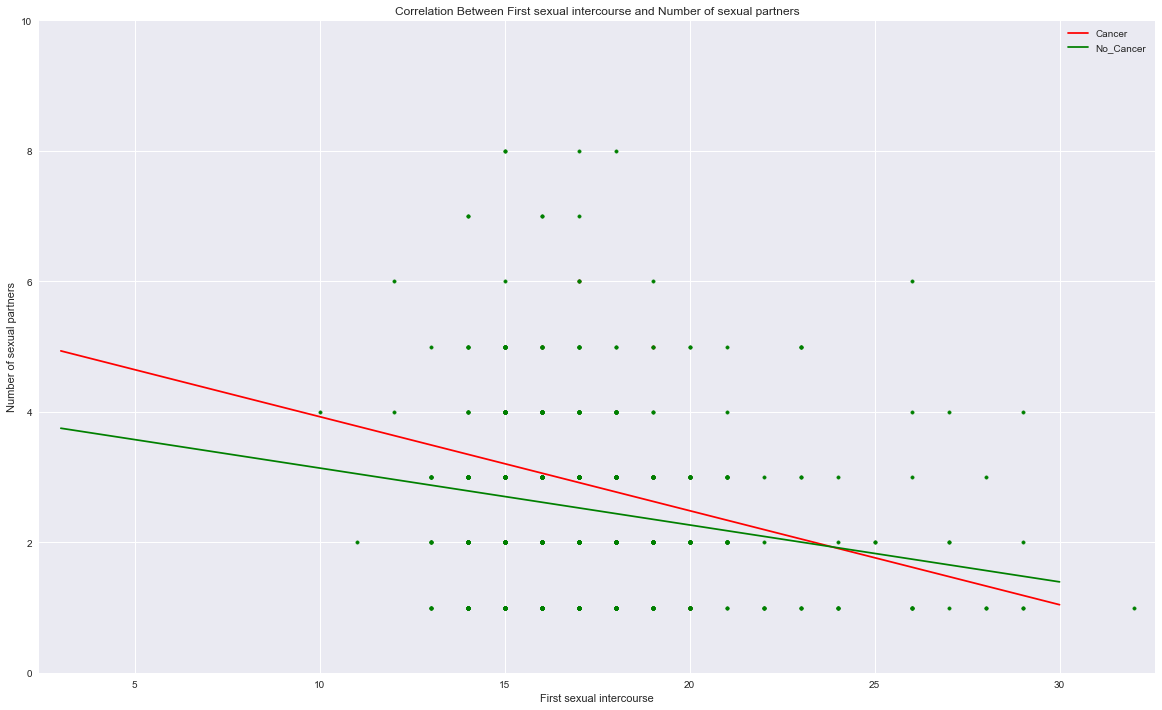

In [25]:
sns.set()
plt.figure(figsize = (20,12))
_ = plt.scatter(df['First sexual intercourse'][df['Dx:Cancer'] == 1], df['Number of sexual partners'][df['Dx:Cancer'] == 1], color = 'red', marker = '.', norm = True)
_ = plt.scatter(df['First sexual intercourse'][df['Dx:Cancer'] == 0], df['Number of sexual partners'][df['Dx:Cancer'] == 0], color = 'green', marker = '.', norm = True)

xm, ym = np.polyfit(df['First sexual intercourse'][df['Dx:Cancer'] == 1], df['Number of sexual partners'][df['Dx:Cancer'] == 1], 1)
xf, yf = np.polyfit(df['First sexual intercourse'][df['Dx:Cancer'] == 0], df['Number of sexual partners'][df['Dx:Cancer'] == 0], 1)
# Make theoretical line to plot
x = np.array([3,30])
y_m = xm * x + ym
y_f = xf * x + yf
# Add regression line to your plot
_ = plt.plot(x, y_m, color='red')
_ = plt.plot(x, y_f, color='green')
_ = plt.legend(('Cancer','No_Cancer'))
_ = plt.ylim((0,10))
_ = plt.xlabel('First sexual intercourse')
_ = plt.ylabel('Number of sexual partners')
_ = plt.title('Correlation Between First sexual intercourse and Number of sexual partners')
plt.margins(0.02)

**There is negative regression between First sexual intercourse and Number of sexual partners for both Cancer and Non-cancer diagnosed patients.**

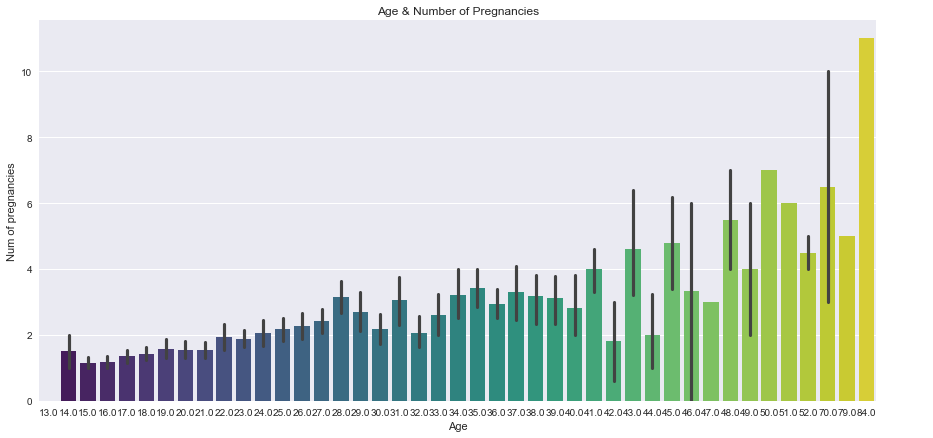

In [26]:
plt.figure(figsize = (15,7))
_ = sns.barplot(x = 'Age', y= 'Num of pregnancies', data = df, palette='viridis')
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = plt.title('Age & Number of Pregnancies')

**To plot the correlation heatmap of non-categorical features, we created a new data set.**

In [33]:
df2 = df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)','Dx:HPV', 'Dx:Cancer']]
df2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Dx:HPV,Dx:Cancer
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0
2,52.0,5.0,16.0,4.0,37.0,1.0,1.0
3,46.0,3.0,21.0,4.0,0.0,0.0,0.0
4,42.0,3.0,23.0,2.0,0.0,0.0,0.0


**Correlation heatmap of non-categorical features, as seen below, there all features in this new data set has correlation with Cancer.**

Text(0.5,1,u'Heatmap of Correlation Between Non-Categorical Features')

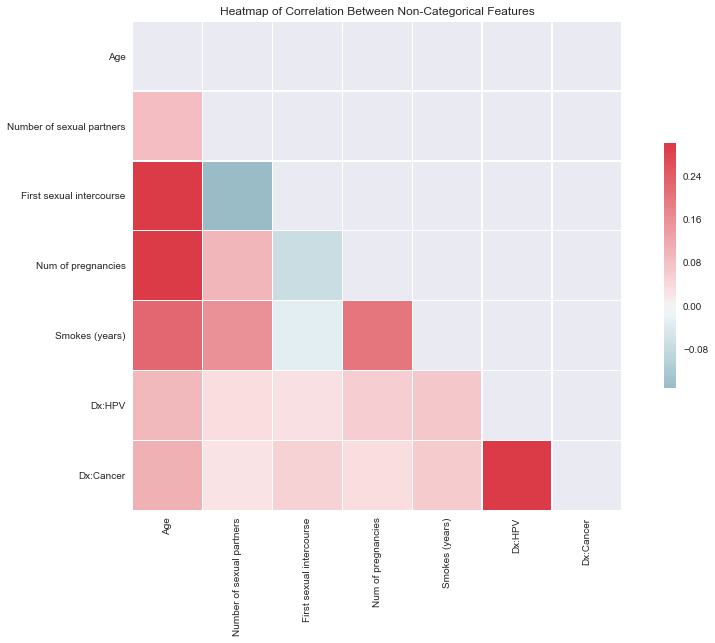

In [12]:
sns.set()
corr = df2.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Between Non-Categorical Features')

In [30]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

print("The pearson correlation of patients diagnosed Cancer and patients diagnoed HPV in the data set: {}".format(pearson_r(df['Dx:Cancer'],df['Dx:HPV'])))

The pearson correlation of patients diagnosed Cancer and patients diagnoed HPV in the data set: 0.907228691142


**Almost 91 patients has HPV out of every one hundred patients diagnosed Cancer. According to the correlation heatmap plot. HPV looks like the main factor for the Cervical Cancer Risk. We will examine this assumption in the hypothesis test of inferential statistics.**

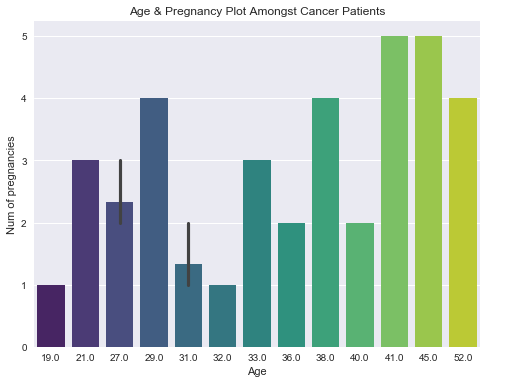

In [31]:
df3 = df[df['Dx:Cancer'] == 1][['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)']]
plt.figure(figsize = (8,6))
_ = sns.barplot(x = 'Age', y = 'Num of pregnancies', data = df3, palette='viridis')
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = plt.title('Age & Pregnancy Plot Amongst Cancer Patients')

**Now it is time for the inferential statistics**